# K-Nearest Neighbors Theory

K-NN can be used for both classification and regression predictive problems. However, it is more widely used in classification problems in the industry. The output of this model depends on whether k-NN is used for classification or regression:

* In k-NN classification, the output is a class membership. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k-nearest neighbors ($k$ is a positive integer, typically small). If $k = 1$, then the object is simply assigned to the class of that single nearest neighbor.
* In k-NN regression, the output is the property value for the object. This value is the average of the values of its k-nearest neighbors.

The _training algorithm_ is very simple and it only store the data. The _prediction algorithm_ then does all required calculation as follows:
1. Calculate the distance of the new point from all data points. Usually the Euclidean Distance is used as the metric.
2. It sorts the data points based on their distance from the new point.
3. Finally, it predicts the majority label of the $k$ closest data points.

## Choosing K

Note that choosing $k$ affects the predicted class of the new point, take a look at the example below for clarity:

<img src="knn.JPG" width="300px"/>

where, as you can see, by considering $k=3$ the class is predicted to Class B, while by considering $k=6$ the class of the new point is predicted to be Class A.

Another effect of $k$ on the model can be seen below:

<img src="knn2.JPG" width="500px"/>

In the example shown in the image above, when $k = 1$, the decision boundary is overly flexible. This corresponds to a classifier that has low bias but very high variance. As $k$ grows, the method becomes less flexible and produces a decision boundary that is close to linear. This corresponds to a low-variance but high-bias classifier.

To choose the right $k$ they usually plot training and test errors for different $k$ values, and choose a number which minimizes both errors. Image below shows the test and training error rates for different $k$ values (based on $1/k$). A good $k$ value can be around 16-17 ($1/k = 0.06$) which minimizes the test error. We can see that after that value, by decreasing k (increasing $1/k$), the training error rate drops while the test error rate increases.

Note: this approach is refered to as the _Elbow Method_.

<img src="errorRate.JPG" width="500px"/>

## Pros and Cons of K-NN

The pros of K-NN are:
* It is very simple to use
* The training is trivial
* It works with any number of classes
* It is easy to add more data
* There are few parametes to adjust: $k$ and the _Distance Metric_

The cons of K-NN are:
* High prediction cost, that gets worse for large data sets
* Does not perform well of high dimensional data
* Categorical features won't work well.



## K-NN with Python

we have a classified data set from a company. They've hidden the feature column names, but have given the data and the target classes. 

We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('Classified Data', index_col=0)

In [4]:
data.head(3)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0


### Preprocessing: Scaling the Features
You should be careful with scale of the feature values when using K-NN, as the larger values will have a larger effect on the predictions. Therefore, we will standardize the scale of the values before we use the in the K-NN:

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
scaler.fit(data.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
scaled_features = scaler.transform(data.drop('TARGET CLASS', axis=1))

In [9]:
X = pd.DataFrame(scaled_features, columns=data.drop('TARGET CLASS', axis=1).columns)

In [10]:
X.head(3)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850


In [11]:
y = data['TARGET CLASS']

### Spliting the Data into Training and Test Sets


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Fitting and Predictions using K-NN and Choosing K

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier(n_neighbors=1)

In [16]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [17]:
prediction = knn.predict(X_test)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
print(classification_report(y_test, prediction))

             precision    recall  f1-score   support

          0       0.91      0.95      0.93       159
          1       0.94      0.89      0.92       141

avg / total       0.92      0.92      0.92       300



In [20]:
pd.DataFrame(confusion_matrix(y_test, prediction))

,0,1
0,151,8
1,15,126


From the precision/recall/f1-score we can see that the model seems to be working well. Also you can see the same on the confusion matrix with the low false-negative and false positive rates. Now let's use the elbow method to choose the right K value.

In [21]:
test_error_rate = []
train_error_rate = []

for i in range(1,40):
    
    knn_temp = KNeighborsClassifier(n_neighbors=i)
    knn_temp.fit(X_train, y_train)
    pred_test = knn_temp.predict(X_test)
    pred_train = knn_temp.predict(X_train)
    test_error_rate.append(np.mean(pred_test != y_test))
    train_error_rate.append(np.mean(pred_train != y_train))

Text(0,0.5,'Test Error Rate')

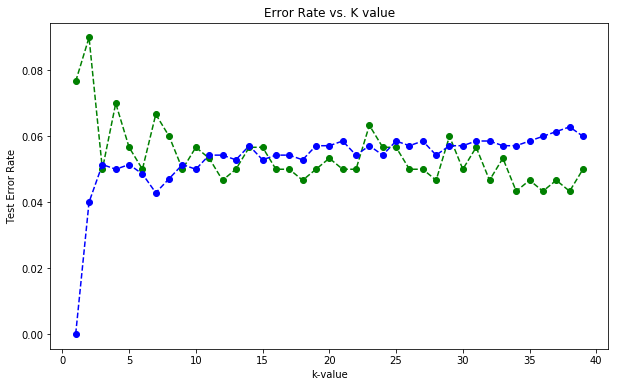

In [24]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40) , test_error_rate, color='green', linestyle='dashed', marker='o')
plt.plot(range(1,40) , train_error_rate, color='blue', linestyle='dashed', marker='o')
plt.title('Error Rate vs. K value')
plt.xlabel('k-value')
plt.ylabel('Test Error Rate')

The jumpyness of the plot is because of the small sample size. We can see that on smaller k-values the test error rate is quite high while the train error rate seems low. 

We can choose the k-value around 17:

In [27]:
knn_17 = KNeighborsClassifier(n_neighbors=17)
knn_17.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='uniform')

In [28]:
predictions_17 = knn_17.predict(X_test)

In [30]:
print(classification_report(y_test, predictions_17))

             precision    recall  f1-score   support

          0       0.94      0.96      0.95       159
          1       0.96      0.94      0.95       141

avg / total       0.95      0.95      0.95       300



In [31]:
pd.DataFrame(confusion_matrix(y_test, predictions_17))

,0,1
0,153,6
1,9,132


We can see that the model has slightly improved.